In [11]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [12]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [13]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [14]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [15]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

sterling us
svetlyy ru
avera pf
richards bay za
busselton au
cidreira br
avarua ck
port alfred za
cape town za
kaeo nz
aykhal ru
trofors no
gold coast au
albany au
khatanga ru
illoqqortoormiut gl
hithadhoo mv
dingle ie
punta arenas cl
grand river south east mu
mataura pf
hobart au
tiksi ru
arraial do cabo br
kapaa us
ixtapa mx
sanmenxia cn
carnarvon au
meyungs pw
bengkulu id
pevek ru
hobart au
kieta pg
gondanglegi id
licata it
etropole bg
magrath ca
port alfred za
ushuaia ar
busselton au
buchanan lr
butaritari ki
kununurra au
dikson ru
kapaa us
rikitea pf
america dourada br
kapaa us
hilo us
atuona pf
sedelnikovo ru
lavrentiya ru
longyearbyen sj
jamestown sh
punta arenas cl
grand-bourg gp
belushya guba ru
yerbogachen ru
mataura pf
rikitea pf
singapore sg
kamenskoye ru
lagoa pt
fort collins us
punta arenas cl
jacqueville ci
bafoulabe ml
torbay ca
kapaa us
butaritari ki
saskylakh ru
prince rupert ca
sheridan us
georgetown sh
punta arenas cl
illoqqortoormiut gl
rikitea pf
atuona pf
samusu 

vila franca do campo pt
punta arenas cl
ushuaia ar
bredasdorp za
dori bf
arraial do cabo br
banda aceh id
chebsara ru
nizhneyansk ru
port victoria ke
dvinskoy ru
punta arenas cl
vestmannaeyjar is
yellowknife ca
rikitea pf
longyearbyen sj
zhob pk
coxcatlan mx
parkes au
superior us
punta arenas cl
punta arenas cl
paamiut gl
kapaa us
sentyabrskiy ru
belushya guba ru
belmonte br
mataura pf
port elizabeth za
belushya guba ru
mahebourg mu
kavieng pg
codrington ag
omsukchan ru
tumannyy ru
dikson ru
khatanga ru
hobyo so
bluff nz
vaitupu wf
punta arenas cl
bengkulu id
dikson ru
kambove cd
rikitea pf
tuktoyaktuk ca
carnarvon au
vaini to
saskylakh ru
touros br
barrow us
aklavik ca
ugoofaaru mv
udachnyy ru
tuim ru
kaitangata nz
bozhou cn
tabiauea ki
hithadhoo mv
barentsburg sj
puerto ayora ec
hobart au
amderma ru
manikganj bd
saleaula ws
fortuna us
harnosand se
saldanha za
faanui pf
avarua ck
inverness ca
gairatganj in
nova olinda do norte br
coihaique cl
vila franca do campo pt
morant bay jm
herm

kavieng pg
tarakan id
port elizabeth za
hobart au
kaitangata nz
poum nc
namibe ao
hobart au
cape town za
sitka us
ushuaia ar
saldanha za
east london za
los llanos de aridane es
rikitea pf
antonina br
wokha in
caravelas br
albany au
samusu ws
saint george bm
rikitea pf
kaitangata nz
leningradskiy ru
rikitea pf
kapaa us


In [16]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

592

In [17]:
import requests
requests.__version__

'2.25.1'

In [18]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [19]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [20]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
    
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass


# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sterling
Processing Record 2 of Set 1 | svetlyy
Processing Record 3 of Set 1 | avera
Processing Record 4 of Set 1 | richards bay
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | cidreira
Processing Record 7 of Set 1 | avarua
Processing Record 8 of Set 1 | port alfred
Processing Record 9 of Set 1 | cape town
Processing Record 10 of Set 1 | kaeo
Processing Record 11 of Set 1 | aykhal
Processing Record 12 of Set 1 | trofors
Processing Record 13 of Set 1 | gold coast
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | khatanga
Processing Record 16 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 17 of Set 1 | hithadhoo
Processing Record 18 of Set 1 | dingle
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 21 of Set 1 | mataura
Processing R

Processing Record 36 of Set 4 | kahului
Processing Record 37 of Set 4 | namtsy
Processing Record 38 of Set 4 | tutoia
Processing Record 39 of Set 4 | bandarbeyla
Processing Record 40 of Set 4 | palu
Processing Record 41 of Set 4 | bonga
Processing Record 42 of Set 4 | laurel
Processing Record 43 of Set 4 | chokurdakh
Processing Record 44 of Set 4 | tiarei
Processing Record 45 of Set 4 | vestmannaeyjar
Processing Record 46 of Set 4 | nioro
Processing Record 47 of Set 4 | sorata
Processing Record 48 of Set 4 | gatton
Processing Record 49 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 50 of Set 4 | brookhaven
Processing Record 1 of Set 5 | faya
Processing Record 2 of Set 5 | lysyye gory
Processing Record 3 of Set 5 | constitucion
Processing Record 4 of Set 5 | vila do maio
Processing Record 5 of Set 5 | kavieng
Processing Record 6 of Set 5 | tuktoyaktuk
Processing Record 7 of Set 5 | foz
Processing Record 8 of Set 5 | rawson
Processing Record 9 of Set 5 | mbarara
Proces

Processing Record 27 of Set 8 | morant bay
Processing Record 28 of Set 8 | guerrero negro
Processing Record 29 of Set 8 | zhigalovo
Processing Record 30 of Set 8 | berzovia
Processing Record 31 of Set 8 | sao jose da coroa grande
Processing Record 32 of Set 8 | lorengau
Processing Record 33 of Set 8 | cabedelo
Processing Record 34 of Set 8 | east london
Processing Record 35 of Set 8 | great falls
Processing Record 36 of Set 8 | corralillo
Processing Record 37 of Set 8 | solnechnyy
Processing Record 38 of Set 8 | chartres
Processing Record 39 of Set 8 | guiyang
Processing Record 40 of Set 8 | curico
Processing Record 41 of Set 8 | mawlaik
Processing Record 42 of Set 8 | jiuquan
Processing Record 43 of Set 8 | larsnes
Processing Record 44 of Set 8 | kundarki
City not found. Skipping...
Processing Record 45 of Set 8 | amnat charoen
Processing Record 46 of Set 8 | iqaluit
Processing Record 47 of Set 8 | nagato
Processing Record 48 of Set 8 | adrar
Processing Record 49 of Set 8 | urumqi
Pro

Processing Record 16 of Set 12 | taoudenni
Processing Record 17 of Set 12 | jamame
Processing Record 18 of Set 12 | pascagoula
Processing Record 19 of Set 12 | port lincoln
Processing Record 20 of Set 12 | loubomo
Processing Record 21 of Set 12 | ahumada
City not found. Skipping...
Processing Record 22 of Set 12 | ust-kuyga
Processing Record 23 of Set 12 | nikolayevka
Processing Record 24 of Set 12 | sataua
City not found. Skipping...
Processing Record 25 of Set 12 | matara
Processing Record 26 of Set 12 | gravdal
Processing Record 27 of Set 12 | vao
Processing Record 28 of Set 12 | dryden
Processing Record 29 of Set 12 | flin flon
Processing Record 30 of Set 12 | leshukonskoye
Processing Record 31 of Set 12 | pacifica
Processing Record 32 of Set 12 | shingu
Processing Record 33 of Set 12 | sorvag
City not found. Skipping...
Processing Record 34 of Set 12 | muisne
Processing Record 35 of Set 12 | plouzane
Processing Record 36 of Set 12 | simpang
Processing Record 37 of Set 12 | alvand


In [21]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sterling,39.0062,-77.4286,80.37,86,75,4.61,US,2021-07-30 01:01:53
1,Svetlyy,54.6750,20.1347,60.85,74,2,10.22,RU,2021-07-30 01:01:53
2,Avera,33.1940,-82.5271,89.71,56,4,6.51,US,2021-07-30 01:01:53
3,Richards Bay,-28.7830,32.0377,60.31,78,1,7.47,ZA,2021-07-30 01:01:54
4,Busselton,-33.6500,115.3333,49.08,70,85,26.44,AU,2021-07-30 01:00:39
5,Cidreira,-30.1811,-50.2056,45.43,71,16,9.06,BR,2021-07-30 01:01:54
6,Avarua,-21.2078,-159.7750,75.25,64,75,9.22,CK,2021-07-30 01:01:07
7,Port Alfred,-33.5906,26.8910,55.20,85,38,9.75,ZA,2021-07-30 01:00:43
8,Cape Town,-33.9258,18.4232,52.12,95,8,1.01,ZA,2021-07-30 01:00:24
9,Kaeo,-35.1000,173.7833,64.33,81,78,12.19,NZ,2021-07-30 01:01:54


In [22]:
# Reorder the column order
new_column_order = ["City", "Country", "Date", "Lat","Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [23]:
city_data_df = city_data_df[new_column_order]

In [24]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sterling,US,2021-07-30 01:01:53,39.0062,-77.4286,80.37,86,75,4.61
1,Svetlyy,RU,2021-07-30 01:01:53,54.6750,20.1347,60.85,74,2,10.22
2,Avera,US,2021-07-30 01:01:53,33.1940,-82.5271,89.71,56,4,6.51
3,Richards Bay,ZA,2021-07-30 01:01:54,-28.7830,32.0377,60.31,78,1,7.47
4,Busselton,AU,2021-07-30 01:00:39,-33.6500,115.3333,49.08,70,85,26.44
...,...,...,...,...,...,...,...,...,...
538,Tarakan,ID,2021-07-30 01:04:19,3.3000,117.6333,80.51,83,51,8.99
539,Poum,NC,2021-07-30 01:04:19,-20.2333,164.0167,73.71,68,5,9.55
540,Antonina,BR,2021-07-30 01:04:19,-25.4286,-48.7119,52.21,76,0,2.53
541,Wokha,IN,2021-07-30 01:04:19,26.1000,94.2667,62.98,98,100,1.77


In [26]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [27]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [28]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1627607508.332808

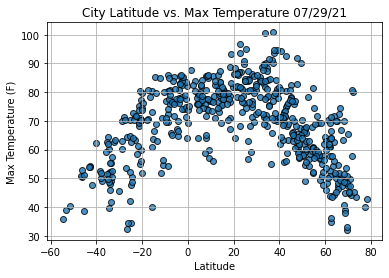

In [29]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

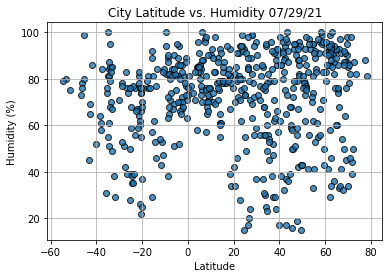

In [30]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

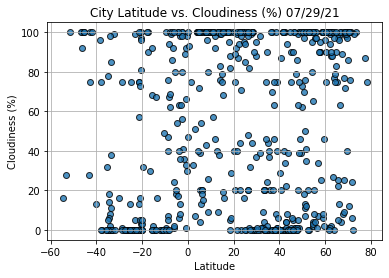

In [31]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

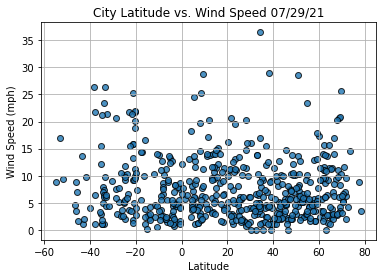

In [32]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [33]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [34]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [35]:
# To create a new DataFrame from a current DataFrame, 
# we can use the loc method on the current DataFrame
index13 = city_data_df.loc[13]
index13

City                       Albany
Country                        US
Date          2021-07-30 00:57:07
Lat                       42.6001
Lng                      -73.9662
Max Temp                    71.53
Humidity                       89
Cloudiness                    100
Wind Speed                   5.23
Name: 13, dtype: object

In [36]:
# Filter a DataFrame based on a value of a row.
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3      False
4      False
       ...  
538     True
539    False
540    False
541     True
542    False
Name: Lat, Length: 543, dtype: bool

In [37]:
# Return a DataFrame with all data fitting the criteria, 
# for latitudes greater than or equal to 0, we can use the 
# loc method 
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sterling,US,2021-07-30 01:01:53,39.0062,-77.4286,80.37,86,75,4.61
1,Svetlyy,RU,2021-07-30 01:01:53,54.6750,20.1347,60.85,74,2,10.22
2,Avera,US,2021-07-30 01:01:53,33.1940,-82.5271,89.71,56,4,6.51
10,Aykhal,RU,2021-07-30 01:01:55,66.0000,111.5000,72.54,33,98,6.93
11,Trofors,NO,2021-07-30 01:01:55,65.5333,13.4063,54.75,75,22,2.84


In [39]:
 # Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

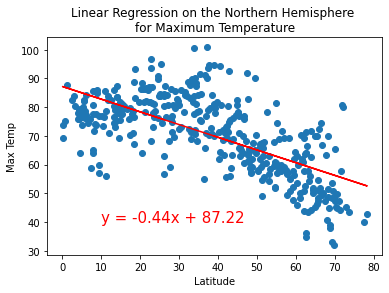

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor Maximum Temperature', 'Max Temp',(10,40))


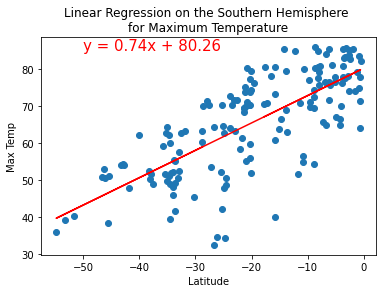

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,"Linear Regression on the Southern Hemisphere \nfor Maximum Temperature", 'Max Temp',(-50,85))

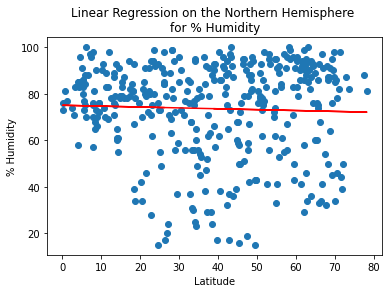

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(40,10))

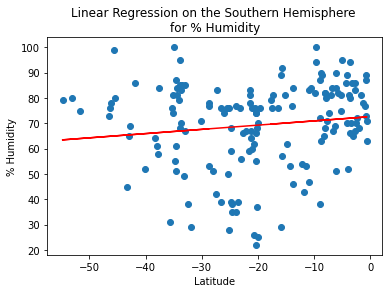

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

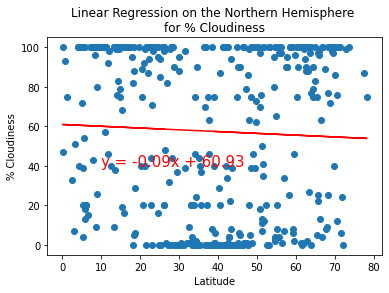

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(10,40))

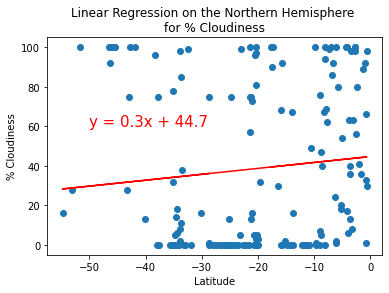

In [45]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))

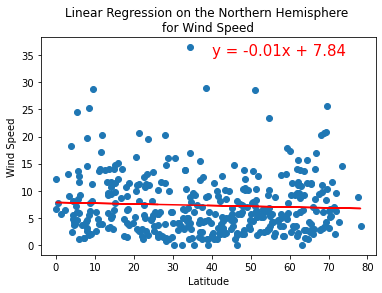

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,35))

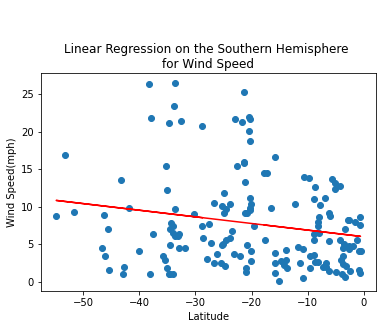

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed','Wind Speed(mph)',(-50,35))

In [48]:
conda install -c conda-forge gmaps


Solving environment: \ 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/osx-64::conda-build==3.21.4=py38hecd8cb5_0
done

## Package Plan ##

  environment location: /Users/johnmiller/opt/anaconda3

  added / updated specs:
    - gmaps


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2021.5.30  |       h033912b_0         136 KB  conda-forge
    certifi-2021.5.30          |   py38h50d1736_0         141 KB  conda-forge
    conda-4.10.3               |   py38h50d1736_0         3.1 MB  conda-forge
    geojson-2.5.0              |             py_0          15 KB  conda-forge
    gmaps-0.9.0                |             py_0         1.7 MB  conda-forge
    jinja2-2.11.3              |     pyh44b312d_0          93 KB  conda-forge
    openssl-1.1.1k             |       h0d85af4_0         

In [49]:
pip install gmaps

Note: you may need to restart the kernel to use updated packages.
